In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv('train_bm.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

numerical columns -> Item_weight, Item_Visibility, Item_MRP

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

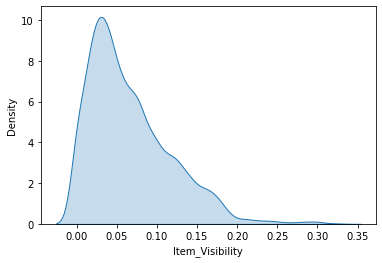

In [47]:
#Analysing feature column Item_visibility
sns.kdeplot(data = df, x = "Item_Visibility", shade = True)

The Data is rightly skewed. Therefore taking log or nth root transformation is appropriate

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

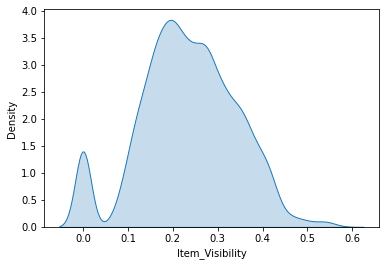

In [48]:
df_copy = df
df_copy.Item_Visibility = np.sqrt(df_copy.Item_Visibility)
sns.kdeplot(data = df_copy, x = "Item_Visibility", shade = True)

The result is a normal Distribution with very few outlier

In [49]:
#testing the data with log transformation
df.Item_Visibility.describe()

count    8523.000000
mean        0.233709
std         0.107301
min         0.000000
25%         0.164285
50%         0.232230
75%         0.307547
max         0.573054
Name: Item_Visibility, dtype: float64

Since all the values are less than 1 we could bring it above 1 and then take log transformation

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

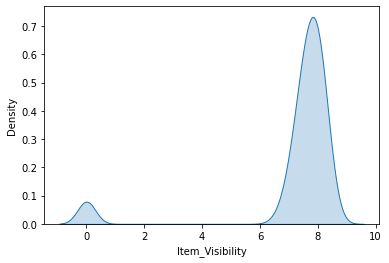

In [54]:
df_copy = df
df_copy.Item_Visibility = df_copy.Item_Visibility * 100
df_copy.Item_Visibility = np.log(df_copy.Item_Visibility+1)
sns.kdeplot(data = df_copy, x = "Item_Visibility", shade = True)

We can see that the data is quite normal after log transformation